#Scrape Nike discount products
https://www.nike.com.hk/running/apparel/list.htm?intpromo=PNTP

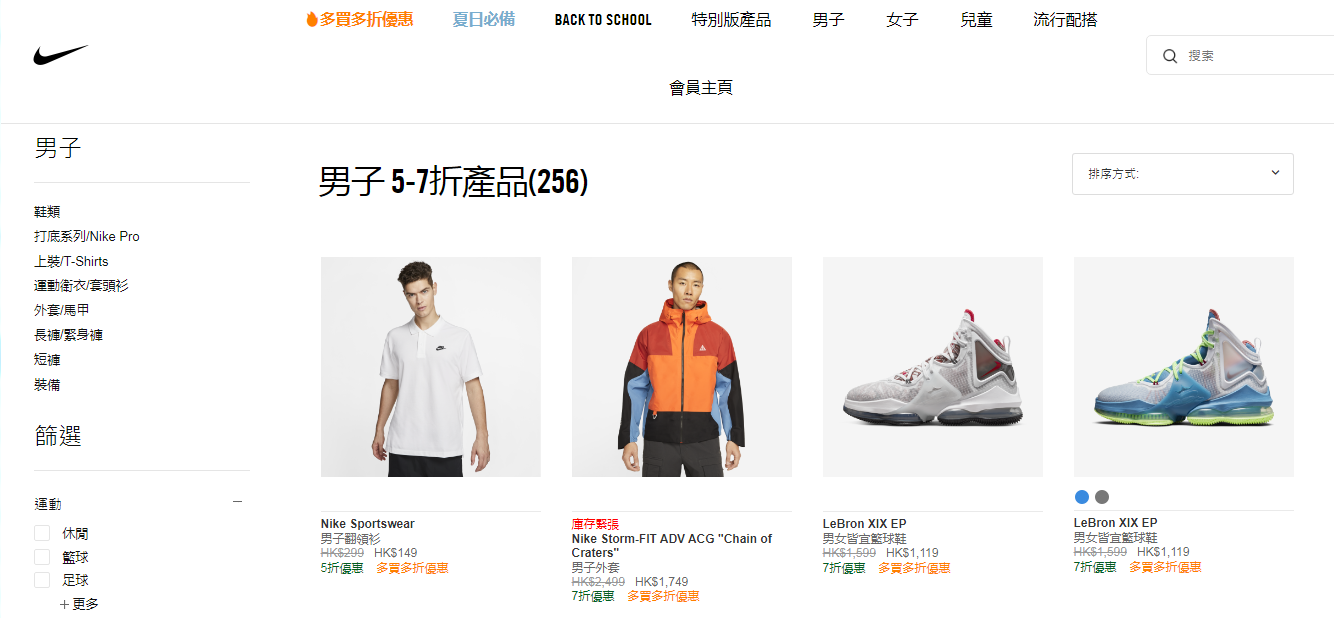

In [ ]:
# import libaries
import pandas as pd
import plotly.express as px
import requests
from bs4 import BeautifulSoup as bs

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# Get the website and view the source
nike_rss = requests.get("https://www.nike.com.hk/running/apparel/list.htm?intpromo=PNTP")
nike_bs = bs(nike_rss.content,'html.parser')
nike_bs

In [ ]:
#locate the product contents
nike_bs_prod = nike_bs.findAll('dl', {"class":"product_list_content"})
nike_bs_prod

In [ ]:
#collect the product name, product description, origial price, and discounted price

product_name, product_description, product_orgPrice, product_disPrice =[],[],[],[]

for item in nike_bs_prod:
  try:

      name = item.findAll('span',{"class": "up"})[0].text
      description = item.findAll('span',{"class": "down"})[0].text
      orgPrice = item.findAll('span',{"class": "origin_price"})[0].text.split("HK$",2)[-1]
      disPrice = item.findAll('dd',{"class": "color666"})[0].text.split("HK$",2)[-1]

      print(name)
      product_name.append(name)

      print(description)
      product_description.append(description)

      print(orgPrice)
      product_orgPrice.append(orgPrice)

      print(disPrice)
      product_disPrice.append(disPrice)

  except:
    print("Some items cannot be parsed")


In [ ]:
#save data into a dataframe
prod_dict ={
    'name':product_name,
    'description':product_description,
    "orig price":product_orgPrice,
    "discount price":product_disPrice
}

df_prod = pd.DataFrame(data=prod_dict)
df_prod['orig price'] = df_prod['orig price'].str.replace(',', '').astype(int)
df_prod['discount price'] = df_prod['discount price'].str.replace(',', '').astype(int)
df_prod

In [ ]:
# calculate the discount %
df_prod['discount %'] = ((df_prod['orig price'] - df_prod['discount price']) / df_prod['orig price']) * 100
df_prod['discount %'] = df_prod['discount %'].round(0)
df_prod

In [ ]:
# Plot an interactive pie chart
productCount = df_prod[['description', 'name']].groupby(['description']).count().reset_index()
productCount.rename(columns={'name' : 'count'}, inplace=True)

fig = px.pie(productCount, values='count', names='description', title='Product Distribution')
fig.show()